In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from Methods.costs import * 
from Methods.least_squares import * 
from Methods.ridge import *
from Methods.cross_validation import *
from Methods.split_data import *
from Methods.scaling_standardization import *
from Methods.build_polynomial import *
from Methods.clearDataset import *
from Methods.logistic import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [4]:
from Methods.proj1_helpers import *
DATA_TRAIN_PATH = 'csv/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Generate predictions and save ouput in csv format for submission:

In [5]:
DATA_TEST_PATH = 'csv/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

# Feature Processing

In [7]:
tX, tX_test = averageData(tX, tX_test)

In [ ]:
boxplot(tX.T, -1000, 2000, 'boxplot_mean')

In [ ]:
tX, tX_test = data_scaling(tX.T, tX_test.T)

# Features transformations

In [8]:
#y, x, tX, method,  tX_test, x_test, **kwargs
for i in range(0, 30): 
    tX, tX_test = add_feature(y, tX[i], tX, log_def, tX_test, tX_test[i])
    tX, tX_test = add_feature(y, tX[i], tX, multiply, tX_test, tX_test[i], degree=2)
    tX, tX_test = add_feature(y, tX[i], tX, multiply, tX_test, tX_test[i], degree=3)
    tX, tX_test = add_feature(y, tX[i], tX, sqrt_def, tX_test, tX_test[i])
    #tX, tX_test = add_feature(y, tX[i], tX, multiply, tX_test, tX_test[i], degree=4)
    #tX, tX_test = add_feature(y, tX[i], tX, multiply, tX_test, tX_test[i], degree=5)
    #tX, tX_test = add_feature(y, tX[i], tX, multiply, tX_test, tX_test[i], degree=6)
    #tX, tX_test = add_feature(y, tX[i], tX, multiply, tX_test, tX_test[i], degree=7)
    #tX, tX_test = add_feature(y, tX[i], tX, multiply, tX_test, tX_test[i], degree=8)   

tX = tX.T

/home/huguenin/ML_project1/projects/project1/scripts/Methods/build_polynomial.py:38: RuntimeWarning: divide by zero encountered in log
  new = np.array([np.log(x)])
/home/huguenin/ML_project1/projects/project1/scripts/Methods/build_polynomial.py:38: RuntimeWarning: invalid value encountered in log
  new = np.array([np.log(x)])
/home/huguenin/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:964: RuntimeWarning: invalid value encountered in multiply
  scl = np.multiply(avg, 0) + scl
/home/huguenin/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:2490: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/huguenin/ML_project1/projects/project1/scripts/Methods/build_polynomial.py:25: RuntimeWarning: invalid value encountered in sqrt
  new = np.array([np.sqrt(x)])


# Models testing

In [11]:

seed = 1
k_fold = 10

# split data in k fold
k_indices = build_k_indices(y, k_fold, seed)

# define lists to store the loss of training data and test data
rmse_tr = []
rmse_te = []
k_list = list(range(k_fold))
#k=7
tot_loss_tr = 0
tot_loss_te = 0
best_accuracy = 0
best_k = 0
weights = np.array([])
for k in k_list:
    loss_tr, loss_te, accuracy_least, w = cross_validation(y, tX, k_indices, k, least_squares)
    tot_loss_tr += loss_tr
    tot_loss_te += loss_te
    if accuracy_least > best_accuracy:
        best_accuracy = accuracy_least
        best_k = k
        weights = w
rmse_tr.append(np.sqrt(2/k_fold * tot_loss_tr))
rmse_te.append(np.sqrt(2/k_fold * tot_loss_te))
print(best_accuracy)
print(best_k)
print(rmse_te)


0.8072
1
[0.88436191686435706]


## Ridge regression

0.794448
2
1e-10
0.907908952851


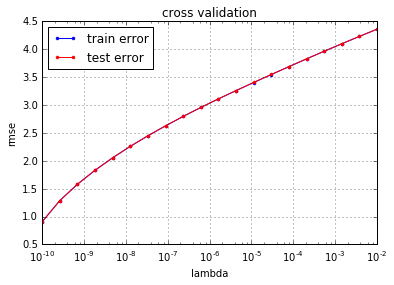

In [8]:
seed = 1
k_fold = 4

# split data in k fold
k_indices = build_k_indices(y, k_fold, seed)

# define lists to store the loss of training data and test data
rmse_tr = []
rmse_te = []
k_list = list(range(k_fold))
#k=7
lambdas = np.logspace(-10, -2, 20)
tot_loss_tr = 0
tot_loss_te = 0
best_accuracy = 0
best_k = 0
best_l = 0
weights = np.array([])
for l in lambdas:
    for k in k_list:
        loss_tr, loss_te, accuracy_least, w = cross_validation(y, tX, k_indices, k, ridge_regression, lambda_=l)
        tot_loss_tr += loss_tr
        tot_loss_te += loss_te
        if accuracy_least > best_accuracy:
            best_accuracy = accuracy_least
            best_k = k
            weights = w
            best_l = l
    rmse_tr.append(np.sqrt(2/k_fold * tot_loss_tr))
    rmse_te.append(np.sqrt(2/k_fold * tot_loss_te))
    
cross_validation_visualization(lambdas, rmse_tr, rmse_te)
print(best_accuracy)
print(best_k)
print(best_l)
print(np.min(rmse_tr))

## Logistic regression

In [20]:
# Logistic regression on half of train data
y_binary = np.copy(y)
y_binary[y_binary == -1] = 0
X_log_tr, y_bin_tr, X_log_te, y_bin_te = split_data(tX, y_binary, 0.7) 
#w_log = logistic_regression_gradient_descent_demo(y_binary[:125000], tX[:125000], 0.0001, 750)
w_log = logistic_regression_gradient_descent(y_bin_tr, X_log_tr, 0.005, 750)

Current iteration=0, the loss=0.6931471805599078
Current iteration=10, the loss=0.6723248424993514
Current iteration=20, the loss=0.6654559375322797
Current iteration=30, the loss=0.6372048468308211
Current iteration=40, the loss=0.6345797133966027
Current iteration=50, the loss=0.6111565662809639
Current iteration=60, the loss=0.5929277661176704
Current iteration=70, the loss=0.5839925544016811
Current iteration=80, the loss=0.57055684966386
Current iteration=90, the loss=0.5625117118518622
Current iteration=100, the loss=0.5483011136281181
Current iteration=110, the loss=0.5423213803761209
Current iteration=120, the loss=0.5322094800134617
Current iteration=130, the loss=0.5251348872942521
Current iteration=140, the loss=0.5183054026205871
Current iteration=150, the loss=0.5168654388271088
Current iteration=160, the loss=0.5031282525053772
Current iteration=170, the loss=0.4952186368243647
Current iteration=180, the loss=0.4836585513775422
Current iteration=190, the loss=0.4929199510

/home/huguenin/ML_project1/projects/project1/scripts/Methods/logistic.py:8: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-t))


Current iteration=500, the loss=0.4120330370288551
Current iteration=510, the loss=0.41696250401580937
Current iteration=520, the loss=0.4132120374772826
Current iteration=530, the loss=0.41564767191006746
Current iteration=540, the loss=0.41846444541280275
Current iteration=550, the loss=0.4146884351021209
Current iteration=560, the loss=0.4188197729749331
Current iteration=570, the loss=0.41935061758640224
Current iteration=580, the loss=0.41132690491411683
Current iteration=590, the loss=0.41355940095438404
Current iteration=600, the loss=0.411977783477169
Current iteration=610, the loss=0.4131298330525655
Current iteration=620, the loss=0.4077640803759758
Current iteration=630, the loss=0.4172416823593676
Current iteration=640, the loss=0.3916309019607269
Current iteration=650, the loss=0.4107203022312534
Current iteration=660, the loss=0.4161810842997675
Current iteration=670, the loss=0.41905723750343477
Current iteration=680, the loss=0.42531431022273214
Current iteration=690, t

In [21]:
vect = sigmoid(np.dot(X_log_te, w_log))
vect[vect >= 0.5] = 1
vect[vect < 0.5] = -1
y_bin_te[y_bin_te == 0] = -1
e_log = y_bin_te - vect[:,0]
rmse_log = np.sqrt(2*calculate_mse(e_log))
tot = 0
print("RMSE: ", rmse_log)

RMSE:  0.858619046299


/home/huguenin/ML_project1/projects/project1/scripts/Methods/logistic.py:8: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-t))


In [16]:
# Prepare output if logistic regression
pred_log = sigmoid(np.dot(tX_test.T, w_log))
pred_log = pred_log[:,0]
pred_log[pred_log >= 0.5] = 1
pred_log[pred_log < 0.5] = -1

/home/huguenin/ML_project1/projects/project1/scripts/Methods/logistic.py:8: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-t))


## Penalized logistic regression

In [25]:
# Logistic regression on 70% of train data
y_binary = np.copy(y)
y_binary[y_binary == -1] = 0
X_log_tr, y_bin_tr, X_log_te, y_bin_te = split_data(tX, y_binary, 0.7) 
#w_log = logistic_regression_gradient_descent_demo(y_binary[:125000], tX[:125000], 0.0001, 750)
w_log_pen = logistic_regression_penalized_gradient_descent(y_bin_tr, X_log_tr, 0.005, 900, 10**(-12))

Current iteration=0, the loss=[[ 0.69314718]]
Current iteration=10, the loss=[[ 0.67295411]]
Current iteration=20, the loss=[[ 0.65523154]]
Current iteration=30, the loss=[[ 0.63744445]]
Current iteration=40, the loss=[[ 0.63265065]]
Current iteration=50, the loss=[[ 0.61098363]]
Current iteration=60, the loss=[[ 0.59374678]]
Current iteration=70, the loss=[[ 0.58235502]]
Current iteration=80, the loss=[[ 0.57198742]]
Current iteration=90, the loss=[[ 0.56067195]]
Current iteration=100, the loss=[[ 0.54847404]]
Current iteration=110, the loss=[[ 0.54105824]]
Current iteration=120, the loss=[[ 0.53304697]]
Current iteration=130, the loss=[[ 0.52897402]]


/home/huguenin/ML_project1/projects/project1/scripts/Methods/logistic.py:8: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-t))


Current iteration=140, the loss=[[ 0.5205458]]
Current iteration=150, the loss=[[ 0.52119361]]
Current iteration=160, the loss=[[ 0.50715631]]
Current iteration=170, the loss=[[ 0.49979092]]
Current iteration=180, the loss=[[ 0.4884175]]
Current iteration=190, the loss=[[ 0.49697983]]
Current iteration=200, the loss=[[ 0.49690944]]
Current iteration=210, the loss=[[ 0.47781862]]
Current iteration=220, the loss=[[ 0.47303368]]
Current iteration=230, the loss=[[ 0.48230667]]
Current iteration=240, the loss=[[ 0.46985791]]
Current iteration=250, the loss=[[ 0.46543297]]
Current iteration=260, the loss=[[ 0.46142816]]
Current iteration=270, the loss=[[ 0.45243041]]
Current iteration=280, the loss=[[ 0.45527545]]
Current iteration=290, the loss=[[ 0.4436634]]
Current iteration=300, the loss=[[ 0.44499183]]
Current iteration=310, the loss=[[ 0.44344566]]
Current iteration=320, the loss=[[ 0.46020749]]
Current iteration=330, the loss=[[ 0.4416031]]
Current iteration=340, the loss=[[ 0.4423475

/home/huguenin/ML_project1/projects/project1/scripts/Methods/logistic.py:17: RuntimeWarning: overflow encountered in exp
  l = np.log(1 + np.exp(np.dot(tx[n], w)))


Current iteration=840, the loss=[[ inf]]
Current iteration=850, the loss=[[ 0.41119495]]
Current iteration=860, the loss=[[ 0.40145252]]
Current iteration=870, the loss=[[ 0.40737838]]
Current iteration=880, the loss=[[ 0.44047662]]
Current iteration=890, the loss=[[ 0.41915533]]
The loss=0.4154495894015615


In [26]:
vect = sigmoid(np.dot(X_log_te, w_log_pen))
vect[vect >= 0.5] = 1
vect[vect < 0.5] = -1
y_bin_te[y_bin_te == 0] = -1
e_log = y_bin_te - vect[:,0]
rmse_log = np.sqrt(2*calculate_mse(e_log))
tot = 0
print("RMSE: ", rmse_log)

RMSE:  0.85880537182


/home/huguenin/ML_project1/projects/project1/scripts/Methods/logistic.py:8: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-t))


# Create submission

In [50]:
OUTPUT_PATH = 'csv/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test.T)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [17]:
OUTPUT_PATH = 'csv/sample-submission.csv'
create_csv_submission(ids_test, pred_log, OUTPUT_PATH)